In [29]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
df = pd.read_csv('Datasets/MDF_final.csv')
df = df.drop_duplicates()
df.user = pd.factorize(df.user)[0]
df.reset_index(drop=True, inplace=True)
df = df[df.rating == 1]
item_labels = [i for i in list(df.columns) if i.find("category") == 0]
place_type = [i for i in list(df.columns) if i.find("place") == 0]
df = df[list(set(df.columns)-set(item_labels+place_type))]

## K-means

In [26]:
kmeans = KMeans(init="random", n_clusters=8, n_init=10, max_iter=200,random_state=42)
kmeans.fit(df.iloc[:, 3:])
df['kmeans'] = kmeans.labels_
df.kmeans.value_counts()

1    15857
4    11800
5    10674
0     2833
2     2648
7     1809
3     1652
6     1464
Name: kmeans, dtype: int64

<AxesSubplot:title={'center':'number of contexts in which an application appear'}, xlabel='item'>

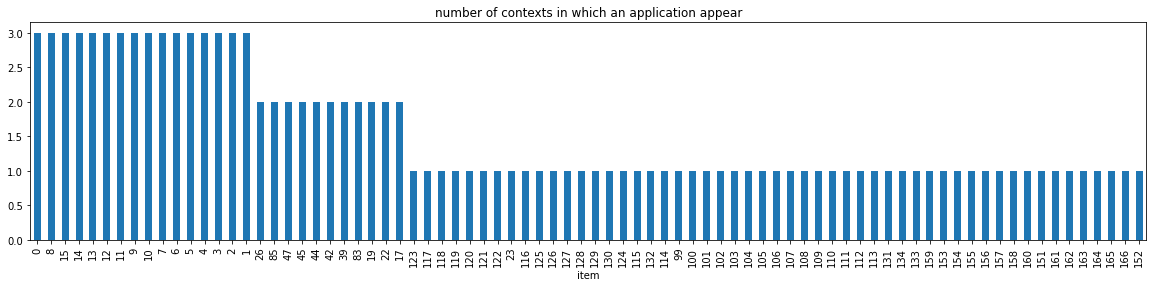

In [27]:
df.groupby(['item'])['kmeans'].nunique().sort_values(ascending=False)[:80].plot.bar(figsize=(20, 4), title='number of contexts in which an application appear')

### Find optimal number of clusters
Where the curve bend is the optimal number of clusters

In [6]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 200,
    "random_state": 42,
}

sse = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df.iloc[:, 3:])
    sse.append(kmeans.inertia_)

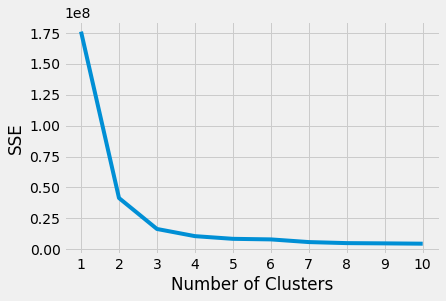

In [7]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

## DBscan

In [23]:
db_scan = DBSCAN(eps=10, min_samples=150, metric='euclidean', metric_params=None, algorithm='auto', leaf_size=50).fit(df.iloc[:, 3:])
df['dbscan'] = db_scan.labels_
df.dbscan.value_counts()

 0    46176
 2     1026
 1      751
 4      546
 3      193
-1       45
Name: dbscan, dtype: int64

<AxesSubplot:title={'center':'number of contexts in which an application appear'}, xlabel='item'>

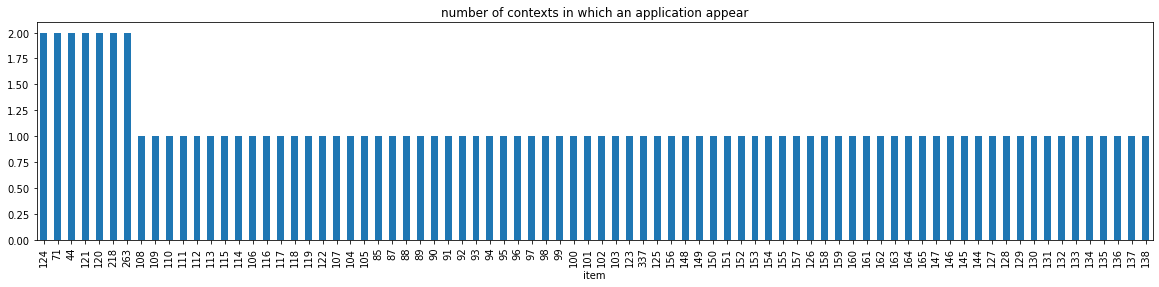

In [24]:
df.groupby(['item'])['dbscan'].nunique().sort_values(ascending=False)[:80].plot.bar(figsize=(20, 4), title='number of contexts in which an application appear')

In [25]:
df.dbscan.value_counts()

 0    46176
 2     1026
 1      751
 4      546
 3      193
-1       45
Name: dbscan, dtype: int64